In [1]:
benchmark = '../out/benchmarks.tsv'

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=12)

In [3]:
import numpy as np
import pandas as pd

In [4]:
strains = ['S288C', 'Y55',
           'UWOP', 'YPS']
scolor = {x: c
          for x,c in zip(strains,
                         sns.color_palette('Set1', len(strains)))}

In [5]:
scolor

{'S288C': (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 'Y55': (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 'UWOP': (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 'YPS': (0.596078431372549, 0.3058823529411765, 0.6392156862745098)}

In [6]:
m = pd.read_table(benchmark)

In [7]:
m['set'].unique()

array(['complexes', 'modules', 'interactions'], dtype=object)

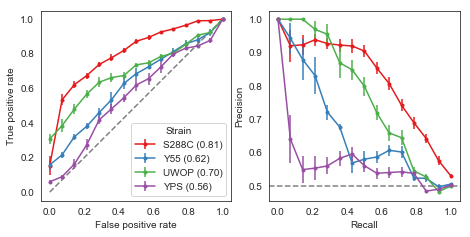

In [8]:
n = m[m['set'] == 'complexes']

c = n.groupby(['test', 'strain', 'round']).apply(lambda v:
              pd.Series(np.interp(np.linspace(0, 1, 15),
                                  v.sort_values('x')['x'],
                                  v.sort_values('x')['y']),
                        index=np.linspace(0, 1, 15)))

plt.figure(figsize=(7.5, 3.5))

for i, test in enumerate(['roc',
                          'precision-recall']):
    plt.subplot(1, 2, i+1)

    for strain, color in scolor.items():
        plt.errorbar(c.columns,
                     c.groupby(['test',
                                'strain']).mean().loc[(test,
                                                       strain), ].values,
                     yerr=c.groupby(['test',
                                     'strain']).mad().loc[(test,
                                                           strain), ].values / 2,
                     color=color,
                     marker='.',
                     label='%s (%.2f)' % (strain,
                                          n.groupby(['test',
                                                     'strain'])[
                                              'auc'
                                          ].mean().loc[(test, strain), ]))
    
    if test == 'roc':
        plt.plot([0, 1],
                 [0, 1],
                 '--',
                 color='grey',
                 zorder=0)
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.legend(loc='lower right',
                   title='Strain')
    else:
        plt.axhline(0.5,
                    color='grey',
                    ls='dashed',
                    zorder=0)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
#         plt.legend(loc='upper right',
#                    title='Strain')

plt.savefig('benchmarks_complexes.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('benchmarks_complexes.svg',
            dpi=300, bbox_inches='tight',
            transparent=True)

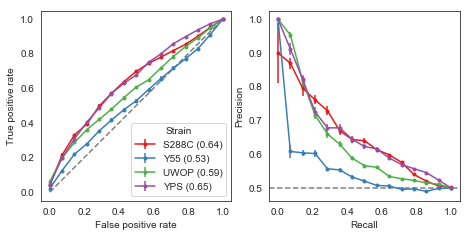

In [9]:
n = m[m['set'] == 'modules']

c = n.groupby(['test', 'strain', 'round']).apply(lambda v:
              pd.Series(np.interp(np.linspace(0, 1, 15),
                                  v.sort_values('x')['x'],
                                  v.sort_values('x')['y']),
                        index=np.linspace(0, 1, 15)))

plt.figure(figsize=(7.5, 3.5))

for i, test in enumerate(['roc',
                          'precision-recall']):
    plt.subplot(1, 2, i+1)

    for strain, color in scolor.items():
        plt.errorbar(c.columns,
                     c.groupby(['test',
                                'strain']).mean().loc[(test,
                                                       strain), ].values,
                     yerr=c.groupby(['test',
                                     'strain']).mad().loc[(test,
                                                           strain), ].values / 2,
                     color=color,
                     marker='.',
                     label='%s (%.2f)' % (strain,
                                          n.groupby(['test',
                                                     'strain'])[
                                              'auc'
                                          ].mean().loc[(test, strain), ]))
    
    if test == 'roc':
        plt.plot([0, 1],
                 [0, 1],
                 '--',
                 color='grey',
                 zorder=0)
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.legend(loc='lower right',
                   title='Strain')
    else:
        plt.axhline(0.5,
                    color='grey',
                    ls='dashed',
                    zorder=0)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
#         plt.legend(loc='upper right',
#                    title='Strain')

plt.savefig('benchmarks_modules.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('benchmarks_modules.svg',
            dpi=300, bbox_inches='tight',
            transparent=True)

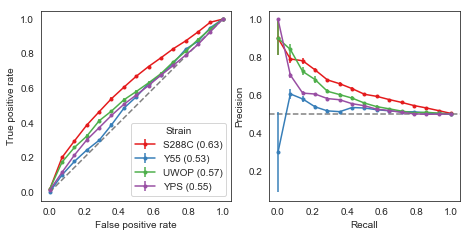

In [10]:
n = m[m['set'] == 'interactions']

c = n.groupby(['test', 'strain', 'round']).apply(lambda v:
              pd.Series(np.interp(np.linspace(0, 1, 15),
                                  v.sort_values('x')['x'],
                                  v.sort_values('x')['y']),
                        index=np.linspace(0, 1, 15)))

plt.figure(figsize=(7.5, 3.5))

for i, test in enumerate(['roc',
                          'precision-recall']):
    plt.subplot(1, 2, i+1)

    for strain, color in scolor.items():
        plt.errorbar(c.columns,
                     c.groupby(['test',
                                'strain']).mean().loc[(test,
                                                       strain), ].values,
                     yerr=c.groupby(['test',
                                     'strain']).mad().loc[(test,
                                                           strain), ].values / 2,
                     color=color,
                     marker='.',
                     label='%s (%.2f)' % (strain,
                                          n.groupby(['test',
                                                     'strain'])[
                                              'auc'
                                          ].mean().loc[(test, strain), ]))
    
    if test == 'roc':
        plt.plot([0, 1],
                 [0, 1],
                 '--',
                 color='grey',
                 zorder=0)
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.legend(loc='lower right',
                   title='Strain')
    else:
        plt.axhline(0.5,
                    color='grey',
                    ls='dashed',
                    zorder=0)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
#         plt.legend(loc='upper right',
#                    title='Strain')

plt.savefig('benchmarks_biogrid.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('benchmarks_biogrid.svg',
            dpi=300, bbox_inches='tight',
            transparent=True)